# 1. Camera Calibration

This script intends to calibrate a camera using an object.
For this implementation we will use the DLT transform for the estimation of the camera parameters. 
The diference from the previous script is the data coordinates are normalized before use.

**Import the libraries**

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
#matplotlib widget

## Direct Linear Transform
Estimates the 11 parameters of the uncalibrated camera(5 from th)

**Implementation:**

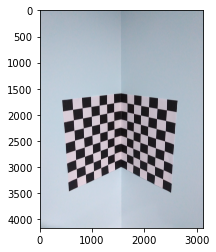

In [3]:
#Import the image
img = cv2.imread("calib_object.jpg")
# convert it to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [4]:
worldcoo = np.array([ (0,0,0), (0,28,0), (56,0,0), (56,28,0), (56,84,0), (84,84,0), (112,56,0),
             (112,84,0), (84,56,0), (84,112,0), (0,28,28), (0,28,56), (0,56,28), (0,56,56), 
             (0,56,84), (0,56,112), (0,112,0), (0,112,28), (0,112,56), (0,112,84), (0,112,112) 
           ])

imagecoo = np.array([ (1549, 1599), (1547, 1763), (1797, 1625), (1793, 1807), (1785, 2156), (1918, 2196),
             (2069, 2051), (2061, 2233), (1928, 2015), (1915, 2366), (1413, 1781), (1280, 1807),
             (1415, 1958), (1283, 1981), (1139, 2013), (990, 2041), (1541, 2251), (1420, 2287),
             (1292, 2320), (1149, 2356), (1005, 2401)
           ])


In [5]:
def Normalization(nd,x):
    '''
    Normalization of coordinates (centroid to the origin and mean distance of sqrt(2 or 3).
    Inputs:
     nd: number of dimensions (2 for 2D; 3 for 3D)
     x: the data to be normalized (directions at different columns and points at rows)
    Outputs:
     Tr: the transformation matrix (translation plus scaling)
     x: the transformed data
    '''

    x = N.asarray(x)
    m, s = N.mean(x,0), N.std(x)
    if nd==2:
        Tr = N.array([[s, 0, m[0]], [0, s, m[1]], [0, 0, 1]])
    else:
        Tr = N.array([[s, 0, 0, m[0]], [0, s, 0, m[1]], [0, 0, s, m[2]], [0, 0, 0, 1]])
        
    Tr = N.linalg.inv(Tr)
    x = N.dot( Tr, N.concatenate( (x.T, N.ones((1,x.shape[0]))) ) )
    x = x[0:nd,:].T

    return Tr, x


### Homogenous coordinates transformation

In [6]:
# get the shape of the matrix
worldm, worldn = worldcoo.shape
imagem, imagen = imagecoo.shape

In [7]:
homo_world = np.append(worldcoo,np.ones((worldm,1)),axis = 1)

In [8]:
#print(worldm)

In [9]:
homo_image = np.append(imagecoo,np.ones((imagem,1)),axis = 1)

In [10]:
#print(homo_image)

In [11]:
#3D DLT
A = []

for i in range(worldm):
    A = np.append(A,[-homo_world[i,0],-homo_world[i,1],-homo_world[i,2],-homo_world[i,3],0,0,0,0,homo_image[i,0]*homo_world[i,0],homo_image[i,0]*homo_world[i,1],homo_image[i,0]*homo_world[i,2],homo_image[i,0]])
    A = np.append(A,[0,0,0,0,-homo_world[i,0],-homo_world[i,1],-homo_world[i,2],-homo_world[i,3],homo_image[i,1]*homo_world[i,0],homo_image[i,1]*homo_world[i,1],homo_image[i,1]*homo_world[i,2],homo_image[i,1]])

#A = np.append(Ax,Ay,axis = 0)

### SVD(Singular Value Decomposition)
Solving a system of linear equations of the form Ax = 0 is equivalent to finding the null space of A. Thus, we can apply the SVD to solve Mp = 0 

In [12]:
# pass the list A as an array
A = np.asarray(A).reshape(21*2,12)
#print(A)
print(A.shape)

(42, 12)


In [13]:
# SVD 
U, S, Vh = np.linalg.svd(A)

In [14]:
L = Vh[-1,:] / Vh[-1,-1]
#Camera projection matrix:
PEst = L.reshape(3,3+1)
print(PEst)

#Mean error of the DLT (mean residual of the DLT transformation in units of camera coordinates):
#uv2 = np.dot( H, np.concatenate( (w.T, np.ones((1,xyz.shape[0]))) ) ) 
#uv2 = uv2/uv2[2,:] 
#mean distance:
#err = np.sqrt( np.mean(np.sum( (uv2[0:2,:].T - uv)**2,1 )) ) 


[[ 2.36976818e+00  6.96763905e-01 -6.11548477e+00  1.54551618e+03]
 [-1.34635303e+00  6.91551094e+00 -1.10848500e+00  1.59385435e+03]
 [-1.18380325e-03  4.65449602e-04 -1.04007480e-03  1.00000000e+00]]


In [15]:
xEst = np.zeros((worldm,3))
for j in range(worldm):
    xEst[j,:]  = np.dot(PEst,homo_world[j])
    xEst[j,:] /= xEst[j,2]
    

In [16]:
print(xEst)

[[1.54551618e+03 1.59385435e+03 1.00000000e+00]
 [1.54489163e+03 1.76449274e+03 1.00000000e+00]
 [1.79737665e+03 1.62626878e+03 1.00000000e+00]
 [1.79324132e+03 1.80840948e+03 1.00000000e+00]
 [1.78530306e+03 2.15805013e+03 1.00000000e+00]
 [1.91889422e+03 2.19405674e+03 1.00000000e+00]
 [2.07050031e+03 2.04854393e+03 1.00000000e+00]
 [2.06225487e+03 2.23269650e+03 1.00000000e+00]
 [1.92482841e+03 2.01594807e+03 1.00000000e+00]
 [1.91312239e+03 2.36729243e+03 1.00000000e+00]
 [1.41658413e+03 1.78517363e+03 1.00000000e+00]
 [1.28044959e+03 1.80711610e+03 1.00000000e+00]
 [1.41763497e+03 1.95606491e+03 1.00000000e+00]
 [1.28336523e+03 1.98285408e+03 1.00000000e+00]
 [1.14076435e+03 2.01130547e+03 1.00000000e+00]
 [9.89032108e+02 2.04157872e+03 1.00000000e+00]
 [1.54311082e+03 2.25104385e+03 1.00000000e+00]
 [1.41965634e+03 2.28478506e+03 1.00000000e+00]
 [1.28896712e+03 2.32050358e+03 1.00000000e+00]
 [1.15038800e+03 2.35837848e+03 1.00000000e+00]
 [1.00318227e+03 2.39861112e+03 1.000000

### Euclidiean coordinate tranformation

In [22]:
print(homo_image[0,1])
print(xEst[0,1])

1599.0
1593.85434549042


In [22]:
estError = np.sum(np.abs(xEst-homo_image))
estError

69.8631540207341

In [23]:
print(xEst[0] - homo_image[0])

[-3.48382385 -5.14565451  0.        ]
